# MLFlow

In [ ]:
!pip install dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import mlflow
import dagshub

import mlflow.tensorflow
from mlflow.models.signature import infer_signature

# Set up MLflow tracking
dagshub.init(repo_owner='simoLoc', repo_name='ProgettoSE4AI', mlflow=True)

# Funzione che attiva il logging automatico di iperparametri, metriche ecc, a seconda della libreria usata.
# Eventualmente possiamo specificarne altre manualmente con mlflow.log_metric()
mlflow.autolog()

# Attiviamo l'autolog per TensorFlow
mlflow.tensorflow.autolog()

# Creiamo un esperimento in MLflow
mlflow.set_experiment("CNN Classification Report")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=c4d5bde0-cc60-4029-98c3-d3ea4a7a1360&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=9a7012775ea6e23602a99e63a76b76df5726a49a4835386aa70f4a4ad5e2feb2




Output()

Accessing as NapMarta

Initialized MLflow to track repo "simoLoc/ProgettoSE4AI"

Repository simoLoc/ProgettoSE4AI initialized!

2025/06/04 13:40:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/06/04 13:40:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/06/04 13:40:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/06/04 13:40:09 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/04 13:40:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


<Experiment: artifact_location='mlflow-artifacts:/830f85127d2b48559d1927a1f9a1830a', creation_time=1748599390777, experiment_id='2', last_update_time=1748599390777, lifecycle_stage='active', name='CNN Classification Report', tags={}>

# Import Librerie

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import shutil
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import seaborn as sns
from PIL import Image
import copy
from tqdm.keras import TqdmCallback

2025/06/04 13:40:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


## Configurazione device

Un oggetto tensorflow.device rappresenta il dispositivo sul quale avverrà l'esecuzione.  Se il dispositivo disponibile è una GPU, allora la stringa in input sarà '/GPU:0', altrimenti nel nostro caso sarà la CPU passando in input '/CPU:0'.

In [ ]:
device = tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0')
!nvidia-smi

Wed Jun  4 13:40:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P0             24W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Apertura dataset già splittato in train e test

In [ ]:
data_dir = '/content/drive/Shareddrives/ProgettoSE4AI/datasetUTK/'

Creazione del `tf.data.Dataset`a partire dal dataframe in precedenza inizializzato, effettua il parsing e il preprocessing delle immagini. In particolare, le trasformazioni effettuate sono:
* `Rescaling`, il quale effettua uno scaling dei valori in un range da 0 a 1, poichè i modelli di deep learning funzionano meglio con valori normalizzati;
* `Normalize`, il quale di standardizzare i dati in un range da [-1, 1], sottraendo per la media e dividendo per la deviazione standard. Prende in input due tuple (che indicano media e deviazione standard) con tre elementi (Red, Green e Blue).



In [ ]:
# apertura CSV degli attributi
data_dir = '/content/drive/Shareddrives/ProgettoSE4AI/datasetUTK/'
csv_dir = data_dir + "list_filtered_attr_utk.csv"

if os.path.exists(csv_dir):
  df_attr = pd.read_csv(csv_dir, delimiter=',')
  df_attr.dataframeName = 'list_filtered_attr_utk.csv'
  df_attr.set_index('img_name', inplace=True)
  nRow, nCol = df_attr.shape
  print(f'There are {nRow} rows and {nCol} columns')
else:
  print("File not found")

print(df_attr.head(5))

There are 4475 rows and 3 columns
                                       age  gender  ethnicity
img_name                                                     
7_1_1_20250604080425477.jpg.chip.jpg     7       1          1
67_0_2_20250604080425485.jpg.chip.jpg   67       0          2
25_0_4_20250604080425494.jpg.chip.jpg   25       0          4
21_0_1_20250604080425502.jpg.chip.jpg   21       0          1
23_1_4_20250604080425512.jpg.chip.jpg   23       1          4


In [ ]:
img_dir = data_dir + 'images_generated_GAN_64_20_0.0003/'

Age da intero ad etichetta 'Young', 'Adult', 'Senior' e 'Elderly'.

In [ ]:
# lista di paths e labels
file_names = df_attr.index.to_list()
file_paths = [os.path.join(img_dir, fn) for fn in file_names]
labels = df_attr[['age', 'gender', 'ethnicity']].to_numpy()

age_labels = pd.cut(df_attr['age'], bins=[0, 20, 50, 80, 120], labels=[0, 1, 2, 3])

# Sostituisci la prima colonna (indice 0) di labels con i valori di age_labels
labels[:, 0] = age_labels.to_numpy()


Split del dataset in 80\% train set e 20\% test set.

In [ ]:
# --- Split train/test ---
finetune_train_paths, finetune_test_paths, finetune_train_labels, finetune_test_labels = train_test_split(
    file_paths,
    labels,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [ ]:
# salvataggio dello split
np.save(os.path.join(data_dir, 'finetune_train_labels.npy'), finetune_train_labels)
np.save(os.path.join(data_dir, 'finetune_test_labels.npy'), finetune_test_labels)
np.save(os.path.join(data_dir, 'finetune_train_paths.npy'), finetune_train_paths)
np.save(os.path.join(data_dir, 'finetune_test_paths.npy'), finetune_test_paths)

In [ ]:
finetune_train_paths = np.load(data_dir + 'finetune_train_paths.npy')
finetune_test_paths = np.load(data_dir + 'finetune_test_paths.npy')
finetune_test_labels = np.load(data_dir + 'finetune_test_labels.npy')
finetune_train_labels = np.load(data_dir + 'finetune_train_labels.npy')


# layers di preprocessing
rescale = tf.keras.layers.Rescaling(1.0 / 255.0)

normalization = tf.keras.layers.Normalization(
    mean=[0.485, 0.456, 0.406],
    variance=[0.229, 0.224, 0.225]
)


# funzione di parsing e preprocessing
@tf.function
def parse_image(path):
    print(path)
    # leggi
    img = tf.io.read_file(path)
    # decodifica come immagine RGB
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    # le immagini originali sono 200x200
    img = tf.image.resize(img, [200, 200])
    # applica rescaling e normalization
    img = rescale(img)
    img = normalization(img)
    return img


# Prepara il dataset completo immagini + label
def create_dataset(image_paths, labels_array):
    AUTOTUNE = tf.data.AUTOTUNE

    images = tf.data.Dataset.from_tensor_slices(image_paths)
    labels = tf.data.Dataset.from_tensor_slices(labels_array)

    dataset = (
        tf.data.Dataset.zip((images, labels))
        .map(lambda path, label: (
            parse_image(path),
            {
                'age': label[0],
                'gender': label[1],
                'ethnicity': label[2]
            }
        ), num_parallel_calls=AUTOTUNE)
        .prefetch(AUTOTUNE)
    )
    return dataset

# Dataset unificati
finetune_train_dataset = create_dataset(finetune_train_paths, finetune_train_labels)
finetune_test_dataset = create_dataset(finetune_test_paths, finetune_test_labels)

for image, label in finetune_train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)

Tensor("path:0", shape=(), dtype=string)
Image shape: (200, 200, 3)
Label: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'gender': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'ethnicity': <tf.Tensor: shape=(), dtype=int64, numpy=3>}


# Definizione CNN

In [ ]:
def create_CNN_multi_output(input_shape,
                          num_ethnicity_classes=5,
                          num_age_classes=4,
                          dropout_rate=0.3,
                          activation='gelu',
                          learning_rate=1e-3):
    inputs = tf.keras.layers.Input(shape=input_shape)


    resnet_model = tf.keras.applications.EfficientNetB0(
      include_top=False,
      weights=None,
      input_tensor=inputs,
      input_shape=input_shape,
      pooling=None,
      classifier_activation='softmax'
    )

    x = resnet_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(32, activation=activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    # Output heads
    age_output = tf.keras.layers.Dense(num_age_classes, activation='softmax', name='age')(x)
    gender_output = tf.keras.layers.Dense(1, activation='sigmoid', name='gender')(x)
    ethnicity_output = tf.keras.layers.Dense(num_ethnicity_classes, activation='softmax', name='ethnicity')(x)

    model = tf.keras.Model(inputs, [age_output, gender_output, ethnicity_output])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss={
            'age': 'sparse_categorical_crossentropy',
            'gender': 'binary_crossentropy',
            'ethnicity': 'sparse_categorical_crossentropy',
        },
        metrics={
            'age': 'accuracy',
            'gender': 'accuracy',
            'ethnicity': 'accuracy'
        }
    )
    return model

# Finetuning

In [ ]:
best_model_path = '/content/drive/Shareddrives/ProgettoSE4AI/train_model/Best_Model_b32_eps15_lr_0.001_dr0.5.keras'
model = create_CNN_multi_output(input_shape=(200, 200, 3), dropout_rate=0.5, learning_rate=0.001)
model.load_weights(best_model_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 440 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_layer_5
1 rescaling_8
2 normalization_8
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 blo

In [ ]:
# Congela fino a layer 104, 149, 62
for layer in model.layers[:63]:
    layer.trainable = False
for layer in model.layers[63:]:
    layer.trainable = True

Ricompilo il modello con un learning rate più basso.

In [ ]:
learning_rate = 1e-5

In [ ]:
epochs = 20
patience = 5

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss={
        'age': 'sparse_categorical_crossentropy',
        'gender': 'binary_crossentropy',
        'ethnicity': 'sparse_categorical_crossentropy',
    },
    metrics={
        'age': 'accuracy',
        'gender': 'accuracy',
        'ethnicity': 'accuracy'
    }
)

## ModelCheckpoint


Salva solo i pesi del modello ogni volta che val_loss migliora.

In [ ]:
best_partial_finetune_path = f'/content/drive/Shareddrives/ProgettoSE4AI/train_model/Best_partial_finetune_lr{learning_rate}_eps{epochs}_p{patience}.keras'

In [ ]:
checkpoint_partial = tf.keras.callbacks.ModelCheckpoint(
    filepath=best_partial_finetune_path,
    monitor='val_ethnicity_loss',
    save_best_only=True,
)

## EarlyStopping


Ferma l’addestramento se val_ethnicity_loss non migliora per 2 epoche. Con restore_best_weights=True, torna ai pesi migliori (non quelli dell’ultima epoca).

In [ ]:
earlystop_partial = tf.keras.callbacks.EarlyStopping(
    monitor='val_ethnicity_loss',
    patience=patience,
    restore_best_weights=True,
    mode='min'
)

## Fit di Finetuning

In [ ]:
batch_size = 32

In [ ]:
finetune_batched_train = finetune_train_dataset.batch(batch_size)
finetune_batched_test = finetune_test_dataset.batch(batch_size)

In [ ]:
history = model.fit(
    finetune_batched_train,
    validation_data=finetune_batched_test,
    epochs=epochs,
    callbacks=[checkpoint_partial, earlystop_partial, TqdmCallback()]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2025/06/04 16:54:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b68340e033f14fdf9dcc349a57a95139', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2025/06/04 16:54:59 WARNING mlflow.data.tensorflow_dataset: Failed to infer schema for TensorFlow dataset. Exception: Failed to infer schema for tf.data.Dataset. Schemas can only be inferred if the dataset consists of tensors. Ragged tensors, tensor arrays, and other types are not supported. Additionally, datasets with nested tensors are not supported.
2025/06/04 16:55:04 WARNING mlflow.data.tensorflow_dataset: Failed to infer schema for TensorFlow dataset. Exception: Failed to infer schema for tf.data.Dataset. Schemas can only be inferred if the dataset consists of tensors. Ragged tensors, tensor arrays, and other types are not supported. Additionally, datasets with nested tensors are not supported.


Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - age_accuracy: 0.5045 - age_loss: 1.5659 - ethnicity_accuracy: 0.1631 - ethnicity_loss: 3.2576 - gender_accuracy: 0.5188 - gender_loss: 1.5150 - loss: 6.3385

112/112 ━━━━━━━━━━━━━━━━━━━━ 132s 584ms/step - age_accuracy: 0.5046 - age_loss: 1.5656 - ethnicity_accuracy: 0.1632 - ethnicity_loss: 3.2573 - gender_accuracy: 0.5187 - gender_loss: 1.5144 - loss: 6.3374 - val_age_accuracy: 0.5184 - val_age_loss: 1.4999 - val_ethnicity_accuracy: 0.1799 - val_ethnicity_loss: 3.0178 - val_gender_accuracy: 0.5028 - val_gender_loss: 1.4865 - val_loss: 6.0037
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - age_accuracy: 0.5239 - age_loss: 1.4512 - ethnicity_accuracy: 0.1562 - ethnicity_loss: 2.9990 - gender_accuracy: 0.5141 - gender_loss: 1.3980 - loss: 5.8482

112/112 ━━━━━━━━━━━━━━━━━━━━ 73s 231ms/step - age_accuracy: 0.5239 - age_loss: 1.4509 - ethnicity_accuracy: 0.1562 - ethnicity_loss: 2.9985 - gender_accuracy: 0.5140 - gender_loss: 1.3975 - loss: 5.8469 - val_age_accuracy: 0.5251 - val_age_loss: 1.4139 - val_ethnicity_accuracy: 0.1866 - val_ethnicity_loss: 2.8108 - val_gender_accuracy: 0.5028 - val_gender_loss: 1.3667 - val_loss: 5.5911
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - age_accuracy: 0.5482 - age_loss: 1.3201 - ethnicity_accuracy: 0.1688 - ethnicity_loss: 2.7455 - gender_accuracy: 0.5200 - gender_loss: 1.2321 - loss: 5.2977

112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 225ms/step - age_accuracy: 0.5483 - age_loss: 1.3202 - ethnicity_accuracy: 0.1688 - ethnicity_loss: 2.7453 - gender_accuracy: 0.5199 - gender_loss: 1.2317 - loss: 5.2973 - val_age_accuracy: 0.5374 - val_age_loss: 1.3379 - val_ethnicity_accuracy: 0.1944 - val_ethnicity_loss: 2.5945 - val_gender_accuracy: 0.5028 - val_gender_loss: 1.2706 - val_loss: 5.2026
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - age_accuracy: 0.5527 - age_loss: 1.2727 - ethnicity_accuracy: 0.1865 - ethnicity_loss: 2.5066 - gender_accuracy: 0.5082 - gender_loss: 1.1447 - loss: 4.9240

112/112 ━━━━━━━━━━━━━━━━━━━━ 29s 256ms/step - age_accuracy: 0.5527 - age_loss: 1.2726 - ethnicity_accuracy: 0.1864 - ethnicity_loss: 2.5063 - gender_accuracy: 0.5081 - gender_loss: 1.1446 - loss: 4.9236 - val_age_accuracy: 0.5464 - val_age_loss: 1.2725 - val_ethnicity_accuracy: 0.2011 - val_ethnicity_loss: 2.4011 - val_gender_accuracy: 0.4994 - val_gender_loss: 1.1721 - val_loss: 4.8453
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - age_accuracy: 0.5631 - age_loss: 1.2029 - ethnicity_accuracy: 0.1830 - ethnicity_loss: 2.3331 - gender_accuracy: 0.5134 - gender_loss: 1.1098 - loss: 4.6458

112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 242ms/step - age_accuracy: 0.5631 - age_loss: 1.2029 - ethnicity_accuracy: 0.1830 - ethnicity_loss: 2.3330 - gender_accuracy: 0.5134 - gender_loss: 1.1094 - loss: 4.6453 - val_age_accuracy: 0.5553 - val_age_loss: 1.2244 - val_ethnicity_accuracy: 0.2156 - val_ethnicity_loss: 2.2395 - val_gender_accuracy: 0.4961 - val_gender_loss: 1.0966 - val_loss: 4.5602
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - age_accuracy: 0.5772 - age_loss: 1.1677 - ethnicity_accuracy: 0.1917 - ethnicity_loss: 2.1987 - gender_accuracy: 0.5159 - gender_loss: 1.0480 - loss: 4.4145

112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 225ms/step - age_accuracy: 0.5772 - age_loss: 1.1677 - ethnicity_accuracy: 0.1917 - ethnicity_loss: 2.1985 - gender_accuracy: 0.5159 - gender_loss: 1.0476 - loss: 4.4138 - val_age_accuracy: 0.5642 - val_age_loss: 1.1829 - val_ethnicity_accuracy: 0.2279 - val_ethnicity_loss: 2.1090 - val_gender_accuracy: 0.5006 - val_gender_loss: 1.0292 - val_loss: 4.3209
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - age_accuracy: 0.5806 - age_loss: 1.1390 - ethnicity_accuracy: 0.2086 - ethnicity_loss: 2.1005 - gender_accuracy: 0.5208 - gender_loss: 0.9635 - loss: 4.2030

112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 219ms/step - age_accuracy: 0.5806 - age_loss: 1.1389 - ethnicity_accuracy: 0.2087 - ethnicity_loss: 2.1001 - gender_accuracy: 0.5207 - gender_loss: 0.9634 - loss: 4.2024 - val_age_accuracy: 0.5665 - val_age_loss: 1.1516 - val_ethnicity_accuracy: 0.2358 - val_ethnicity_loss: 2.0022 - val_gender_accuracy: 0.5073 - val_gender_loss: 0.9822 - val_loss: 4.1359
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - age_accuracy: 0.5903 - age_loss: 1.1042 - ethnicity_accuracy: 0.2171 - ethnicity_loss: 2.0039 - gender_accuracy: 0.5128 - gender_loss: 0.9229 - loss: 4.0311

112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 221ms/step - age_accuracy: 0.5903 - age_loss: 1.1043 - ethnicity_accuracy: 0.2172 - ethnicity_loss: 2.0037 - gender_accuracy: 0.5128 - gender_loss: 0.9228 - loss: 4.0308 - val_age_accuracy: 0.5732 - val_age_loss: 1.1270 - val_ethnicity_accuracy: 0.2436 - val_ethnicity_loss: 1.9124 - val_gender_accuracy: 0.5028 - val_gender_loss: 0.9450 - val_loss: 3.9842
Epoch 9/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - age_accuracy: 0.5962 - age_loss: 1.0641 - ethnicity_accuracy: 0.2196 - ethnicity_loss: 1.9205 - gender_accuracy: 0.5197 - gender_loss: 0.8768 - loss: 3.8614

112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - age_accuracy: 0.5962 - age_loss: 1.0642 - ethnicity_accuracy: 0.2196 - ethnicity_loss: 1.9203 - gender_accuracy: 0.5197 - gender_loss: 0.8768 - loss: 3.8613 - val_age_accuracy: 0.5810 - val_age_loss: 1.1049 - val_ethnicity_accuracy: 0.2536 - val_ethnicity_loss: 1.8383 - val_gender_accuracy: 0.5039 - val_gender_loss: 0.9085 - val_loss: 3.8515
Epoch 10/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - age_accuracy: 0.6052 - age_loss: 1.0517 - ethnicity_accuracy: 0.2335 - ethnicity_loss: 1.8355 - gender_accuracy: 0.5215 - gender_loss: 0.8468 - loss: 3.7340

112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 244ms/step - age_accuracy: 0.6052 - age_loss: 1.0518 - ethnicity_accuracy: 0.2335 - ethnicity_loss: 1.8354 - gender_accuracy: 0.5215 - gender_loss: 0.8468 - loss: 3.7339 - val_age_accuracy: 0.5844 - val_age_loss: 1.0848 - val_ethnicity_accuracy: 0.2648 - val_ethnicity_loss: 1.7795 - val_gender_accuracy: 0.4939 - val_gender_loss: 0.8762 - val_loss: 3.7404
Epoch 11/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - age_accuracy: 0.6089 - age_loss: 1.0285 - ethnicity_accuracy: 0.2534 - ethnicity_loss: 1.7690 - gender_accuracy: 0.5196 - gender_loss: 0.8336 - loss: 3.6311

112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 227ms/step - age_accuracy: 0.6089 - age_loss: 1.0287 - ethnicity_accuracy: 0.2534 - ethnicity_loss: 1.7689 - gender_accuracy: 0.5196 - gender_loss: 0.8336 - loss: 3.6312 - val_age_accuracy: 0.5877 - val_age_loss: 1.0703 - val_ethnicity_accuracy: 0.2793 - val_ethnicity_loss: 1.7325 - val_gender_accuracy: 0.4961 - val_gender_loss: 0.8537 - val_loss: 3.6565
Epoch 12/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - age_accuracy: 0.6167 - age_loss: 1.0071 - ethnicity_accuracy: 0.2410 - ethnicity_loss: 1.7353 - gender_accuracy: 0.5348 - gender_loss: 0.8121 - loss: 3.5544

112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 221ms/step - age_accuracy: 0.6166 - age_loss: 1.0073 - ethnicity_accuracy: 0.2411 - ethnicity_loss: 1.7352 - gender_accuracy: 0.5347 - gender_loss: 0.8120 - loss: 3.5545 - val_age_accuracy: 0.5911 - val_age_loss: 1.0579 - val_ethnicity_accuracy: 0.2838 - val_ethnicity_loss: 1.6944 - val_gender_accuracy: 0.4916 - val_gender_loss: 0.8342 - val_loss: 3.5865
Epoch 13/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - age_accuracy: 0.6147 - age_loss: 1.0070 - ethnicity_accuracy: 0.2619 - ethnicity_loss: 1.6914 - gender_accuracy: 0.5225 - gender_loss: 0.7975 - loss: 3.4959

112/112 ━━━━━━━━━━━━━━━━━━━━ 26s 222ms/step - age_accuracy: 0.6146 - age_loss: 1.0071 - ethnicity_accuracy: 0.2620 - ethnicity_loss: 1.6914 - gender_accuracy: 0.5224 - gender_loss: 0.7975 - loss: 3.4960 - val_age_accuracy: 0.5944 - val_age_loss: 1.0473 - val_ethnicity_accuracy: 0.2939 - val_ethnicity_loss: 1.6638 - val_gender_accuracy: 0.4872 - val_gender_loss: 0.8187 - val_loss: 3.5297
Epoch 14/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - age_accuracy: 0.6238 - age_loss: 0.9877 - ethnicity_accuracy: 0.2769 - ethnicity_loss: 1.6792 - gender_accuracy: 0.5362 - gender_loss: 0.7608 - loss: 3.4277

112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 241ms/step - age_accuracy: 0.6237 - age_loss: 0.9879 - ethnicity_accuracy: 0.2769 - ethnicity_loss: 1.6791 - gender_accuracy: 0.5361 - gender_loss: 0.7608 - loss: 3.4278 - val_age_accuracy: 0.5978 - val_age_loss: 1.0367 - val_ethnicity_accuracy: 0.3028 - val_ethnicity_loss: 1.6339 - val_gender_accuracy: 0.4927 - val_gender_loss: 0.8049 - val_loss: 3.4754
Epoch 15/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - age_accuracy: 0.6251 - age_loss: 0.9835 - ethnicity_accuracy: 0.2766 - ethnicity_loss: 1.6454 - gender_accuracy: 0.5311 - gender_loss: 0.7723 - loss: 3.4011

112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 240ms/step - age_accuracy: 0.6251 - age_loss: 0.9836 - ethnicity_accuracy: 0.2767 - ethnicity_loss: 1.6454 - gender_accuracy: 0.5311 - gender_loss: 0.7722 - loss: 3.4012 - val_age_accuracy: 0.5989 - val_age_loss: 1.0282 - val_ethnicity_accuracy: 0.3084 - val_ethnicity_loss: 1.6109 - val_gender_accuracy: 0.4916 - val_gender_loss: 0.7939 - val_loss: 3.4330
Epoch 16/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - age_accuracy: 0.6307 - age_loss: 0.9667 - ethnicity_accuracy: 0.2902 - ethnicity_loss: 1.6333 - gender_accuracy: 0.5304 - gender_loss: 0.7607 - loss: 3.3607

112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 242ms/step - age_accuracy: 0.6306 - age_loss: 0.9668 - ethnicity_accuracy: 0.2902 - ethnicity_loss: 1.6333 - gender_accuracy: 0.5304 - gender_loss: 0.7606 - loss: 3.3607 - val_age_accuracy: 0.6011 - val_age_loss: 1.0210 - val_ethnicity_accuracy: 0.3106 - val_ethnicity_loss: 1.5916 - val_gender_accuracy: 0.4905 - val_gender_loss: 0.7849 - val_loss: 3.3976
Epoch 17/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - age_accuracy: 0.6306 - age_loss: 0.9719 - ethnicity_accuracy: 0.2930 - ethnicity_loss: 1.6225 - gender_accuracy: 0.5314 - gender_loss: 0.7488 - loss: 3.3431

112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 226ms/step - age_accuracy: 0.6306 - age_loss: 0.9720 - ethnicity_accuracy: 0.2931 - ethnicity_loss: 1.6224 - gender_accuracy: 0.5314 - gender_loss: 0.7488 - loss: 3.3432 - val_age_accuracy: 0.6067 - val_age_loss: 1.0142 - val_ethnicity_accuracy: 0.3196 - val_ethnicity_loss: 1.5727 - val_gender_accuracy: 0.4894 - val_gender_loss: 0.7762 - val_loss: 3.3631
Epoch 18/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - age_accuracy: 0.6211 - age_loss: 0.9723 - ethnicity_accuracy: 0.2960 - ethnicity_loss: 1.5955 - gender_accuracy: 0.5279 - gender_loss: 0.7432 - loss: 3.3110

112/112 ━━━━━━━━━━━━━━━━━━━━ 28s 247ms/step - age_accuracy: 0.6211 - age_loss: 0.9724 - ethnicity_accuracy: 0.2960 - ethnicity_loss: 1.5953 - gender_accuracy: 0.5279 - gender_loss: 0.7432 - loss: 3.3110 - val_age_accuracy: 0.6078 - val_age_loss: 1.0079 - val_ethnicity_accuracy: 0.3196 - val_ethnicity_loss: 1.5580 - val_gender_accuracy: 0.4872 - val_gender_loss: 0.7687 - val_loss: 3.3347
Epoch 19/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - age_accuracy: 0.6275 - age_loss: 0.9643 - ethnicity_accuracy: 0.2983 - ethnicity_loss: 1.5776 - gender_accuracy: 0.5354 - gender_loss: 0.7346 - loss: 3.2765

112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 220ms/step - age_accuracy: 0.6275 - age_loss: 0.9644 - ethnicity_accuracy: 0.2983 - ethnicity_loss: 1.5776 - gender_accuracy: 0.5354 - gender_loss: 0.7345 - loss: 3.2766 - val_age_accuracy: 0.6134 - val_age_loss: 1.0021 - val_ethnicity_accuracy: 0.3263 - val_ethnicity_loss: 1.5446 - val_gender_accuracy: 0.4816 - val_gender_loss: 0.7629 - val_loss: 3.3097
Epoch 20/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - age_accuracy: 0.6359 - age_loss: 0.9584 - ethnicity_accuracy: 0.3120 - ethnicity_loss: 1.5550 - gender_accuracy: 0.5278 - gender_loss: 0.7302 - loss: 3.2436

112/112 ━━━━━━━━━━━━━━━━━━━━ 28s 246ms/step - age_accuracy: 0.6358 - age_loss: 0.9585 - ethnicity_accuracy: 0.3120 - ethnicity_loss: 1.5551 - gender_accuracy: 0.5278 - gender_loss: 0.7302 - loss: 3.2437 - val_age_accuracy: 0.6134 - val_age_loss: 0.9966 - val_ethnicity_accuracy: 0.3263 - val_ethnicity_loss: 1.5325 - val_gender_accuracy: 0.4883 - val_gender_loss: 0.7571 - val_loss: 3.2862


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
🏃 View run adorable-fish-893 at: https://dagshub.com/simoLoc/ProgettoSE4AI.mlflow/#/experiments/2/runs/b68340e033f14fdf9dcc349a57a95139
🧪 View experiment at: https://dagshub.com/simoLoc/ProgettoSE4AI.mlflow/#/experiments/2


In [ ]:
best_finetune_path = f'/content/drive/Shareddrives/ProgettoSE4AI/train_model/Best_finetune_eps{epochs}_lr{learning_rate}_p{patience}.keras'
model.save(best_finetune_path)

print(f"Best model saved to: {best_finetune_path}")

Best model saved to: /content/drive/Shareddrives/ProgettoSE4AI/train_model/Best_finetune_eps20_lr1e-05_p5.keras


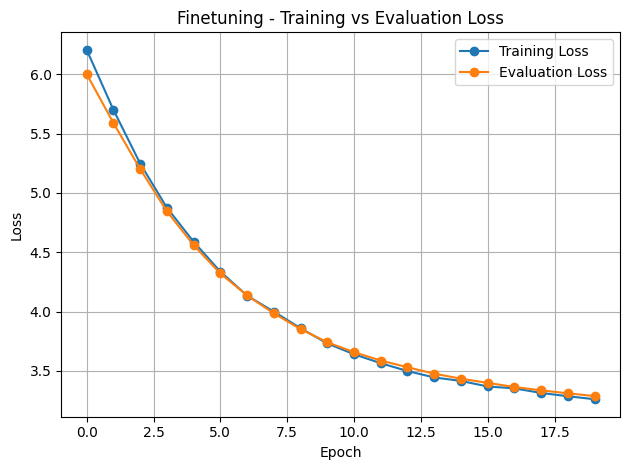

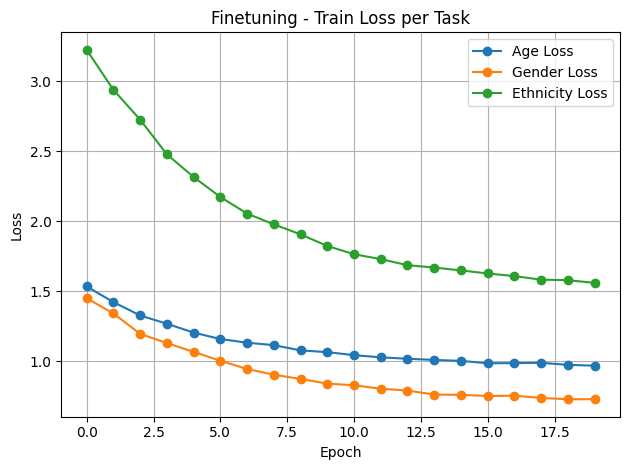

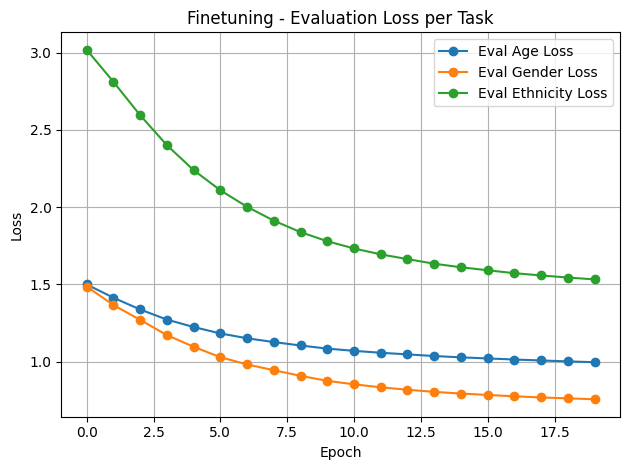

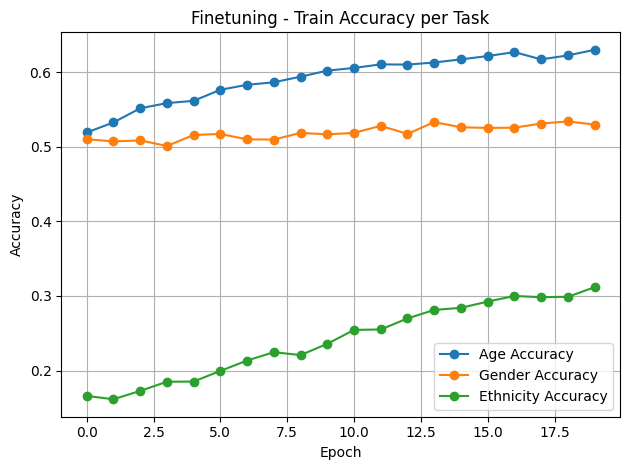

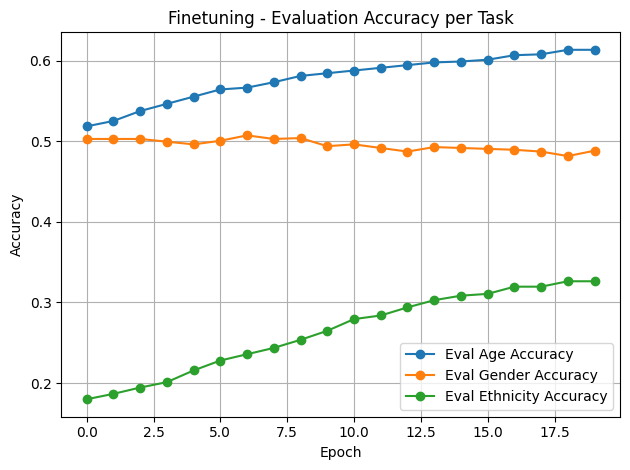

In [ ]:
# Training vs Evaluation Loss
plt.figure()
plt.plot(history.history['loss'], marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', label='Evaluation Loss')
plt.title('Finetuning - Training vs Evaluation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('finetune_training_vs_validation_loss.png')
plt.show()

# Train Loss per task
plt.figure()
plt.plot(history.history['age_loss'], marker='o', label='Age Loss')
plt.plot(history.history['gender_loss'], marker='o', label='Gender Loss')
plt.plot(history.history['ethnicity_loss'], marker='o', label='Ethnicity Loss')
plt.title('Finetuning - Train Loss per Task')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('finetune_train_task_loss.png')
plt.show()

# Evaluation Loss per task
plt.figure()
plt.plot(history.history['val_age_loss'], marker='o', label='Eval Age Loss')
plt.plot(history.history['val_gender_loss'], marker='o', label='Eval Gender Loss')
plt.plot(history.history['val_ethnicity_loss'], marker='o', label='Eval Ethnicity Loss')
plt.title('Finetuning - Evaluation Loss per Task')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('finetune_validation_task_loss.png')
plt.show()

# Train Accuracy per task
plt.figure()
plt.plot(history.history['age_accuracy'], marker='o', label='Age Accuracy')
plt.plot(history.history['gender_accuracy'], marker='o', label='Gender Accuracy')
plt.plot(history.history['ethnicity_accuracy'], marker='o', label='Ethnicity Accuracy')
plt.title('Finetuning - Train Accuracy per Task')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('finetune_train_task_accuracy.png')
plt.show()

# Evaluation Accuracy per task
plt.figure()
plt.plot(history.history['val_age_accuracy'], marker='o', label='Eval Age Accuracy')
plt.plot(history.history['val_gender_accuracy'], marker='o', label='Eval Gender Accuracy')
plt.plot(history.history['val_ethnicity_accuracy'], marker='o', label='Eval Ethnicity Accuracy')
plt.title('Finetuning - Evaluation Accuracy per Task')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('finetune_validation_task_accuracy.png')
plt.show()

# Evaluation

In [ ]:
dic = {
  "age": {
    "0": "Young",
    "1": "Adult",
    "2": "Senior",
    "3": "Elderly"
  },
  "ethnicity": {
    "0": "White",
    "1": "Black",
    "2": "Asian",
    "3": "Indian",
    "4": "Others"
  },
  "gender": {
    "0": "Male",
    "1": "Female"
  }
}


In [ ]:
train_paths = np.load(data_dir + 'train_paths.npy')
test_paths = np.load(data_dir + 'test_paths.npy')
test_labels_np = np.load(data_dir + 'test_labels.npy')
train_labels_np = np.load(data_dir + 'train_labels.npy')


# layers di preprocessing
rescale = tf.keras.layers.Rescaling(1.0 / 255.0)

normalization = tf.keras.layers.Normalization(
    mean=[0.485, 0.456, 0.406],
    variance=[0.229, 0.224, 0.225]
)


# funzione di parsing e preprocessing
@tf.function
def parse_image(path):
    # leggi
    img = tf.io.read_file('/content/drive/Shareddrives/ProgettoSE4AI/' + path)
    # decodifica come immagine RGB
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    # le immagini originali sono 200x200
    img = tf.image.resize(img, [200, 200])
    # applica rescaling e normalization
    img = rescale(img)
    img = normalization(img)
    return img


# Prepara il dataset completo immagini + label
def create_dataset(image_paths, labels_array):
    AUTOTUNE = tf.data.AUTOTUNE

    images = tf.data.Dataset.from_tensor_slices(image_paths)
    labels = tf.data.Dataset.from_tensor_slices(labels_array)

    dataset = (
        tf.data.Dataset.zip((images, labels))
        .map(lambda path, label: (
            parse_image(path),
            {
                'age': label[0],
                'gender': label[1],
                'ethnicity': label[2]
            }
        ), num_parallel_calls=AUTOTUNE)
        .prefetch(AUTOTUNE)
    )
    return dataset

# Dataset unificati
train_dataset = create_dataset(train_paths, train_labels_np)
test_dataset = create_dataset(test_paths, test_labels_np)

# Verifica
for image, label in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)

Image shape: (200, 200, 3)
Label: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'gender': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'ethnicity': <tf.Tensor: shape=(), dtype=int64, numpy=3>}


In [ ]:
best_model_path = '/content/drive/Shareddrives/ProgettoSE4AI/train_model/Best_finetune_eps20_lr1e-05_p5.keras'
model = create_CNN_multi_output(input_shape=(200, 200, 3), dropout_rate=0.5, learning_rate=1e-3)
model.load_weights(best_model_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 330 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_test_age = test_labels_np[:, 0]   # array di shape (N,)
y_test_gender = test_labels_np[:, 1]   # array di shape (N,)
y_test_ethnicity= test_labels_np[:, 2]   # array di shape (N,)

batch_size = 32
test_dataset_batched = test_dataset.batch(batch_size)

raw_preds = model.predict(test_dataset_batched)
# raw_preds sarà un dict del tipo:
# [
#   array di shape (N, num_class_age),      # age
#   array di shape (N, 1),                  # gender
#   array di shape (N, num_class_ethnicity) # ethnicity
# ]

127/127 ━━━━━━━━━━━━━━━━━━━━ 29s 180ms/step


In [ ]:
y_pred_age = np.argmax(raw_preds[0], axis=1)

y_pred_gender = np.round(raw_preds[1]).astype(int).flatten()

y_pred_ethnicity = np.argmax(raw_preds[2], axis=1)

classes_age = [dic["age"][str(i)] for i in range(len(dic["age"]))]
classes_gender = [dic["gender"][str(i)] for i in range(len(dic["gender"]))]
classes_ethnicity = [dic["ethnicity"][str(i)] for i in range(len(dic["ethnicity"]))]

In [ ]:
def get_info_evaluation(y_test, y_pred, classes, attribute_name):
    # Matrice di confusione basata su indici interi
    cm = confusion_matrix(y_test, y_pred)

    # Classification report con nomi delle classi
    cr = classification_report(y_test, y_pred, target_names=classes)

    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    print("Classification Report\n", cr)
    print(f"F1: {f1}%")
    print(f"Recall: {recall}%")
    print(f"Precision: {precision}%")
    print(f"Accuracy: {accuracy}%")

    mlflow.log_metric(f"{attribute_name}_accuracy", accuracy)
    mlflow.log_metric(f"{attribute_name}_precision", precision)
    mlflow.log_metric(f"{attribute_name}_recall", recall)
    mlflow.log_metric(f"{attribute_name}_f1", f1)

    # Salviamo il classification report come artifact
    report_path = f"{attribute_name}_classification_report.txt"
    with open(report_path, "w") as f:
      f.write(cr)
    mlflow.log_artifact(report_path)
    os.remove(report_path)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(xticks_rotation='vertical', ax=ax, cmap=plt.cm.Blues)

    # Salviamo la matrice di confusione come immagine
    fig_path = f"{attribute_name}_confusion_matrix.png"
    plt.savefig(fig_path)

    mlflow.log_artifact(fig_path)
    plt.show()
    plt.close()
    os.remove(fig_path)

    return accuracy, precision, recall, f1

=== VALUTAZIONE per AGE ===
Classification Report
               precision    recall  f1-score   support

       Young       0.95      0.65      0.77       970
       Adult       0.68      0.99      0.81      2182
      Senior       0.71      0.18      0.29       787
     Elderly       0.63      0.12      0.20       102

    accuracy                           0.73      4041
   macro avg       0.74      0.48      0.52      4041
weighted avg       0.75      0.73      0.68      4041

F1: 51.65%
Recall: 48.39%
Precision: 74.46%
Accuracy: 72.78%


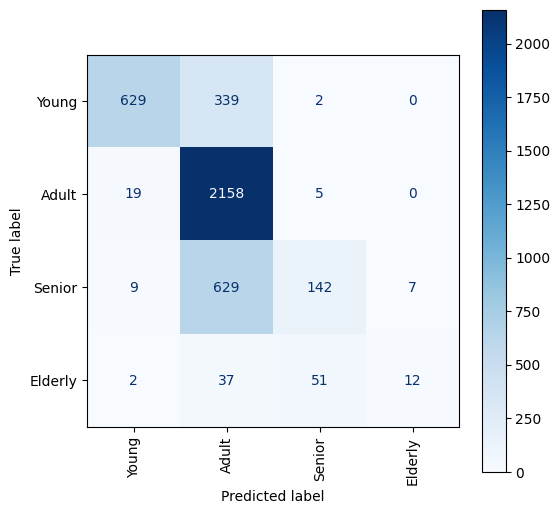


=== VALUTAZIONE per GENDER ===
Classification Report
               precision    recall  f1-score   support

        Male       0.83      0.77      0.80      2042
      Female       0.78      0.84      0.81      1999

    accuracy                           0.81      4041
   macro avg       0.81      0.81      0.81      4041
weighted avg       0.81      0.81      0.81      4041

F1: 80.59%
Recall: 80.63%
Precision: 80.74%
Accuracy: 80.6%


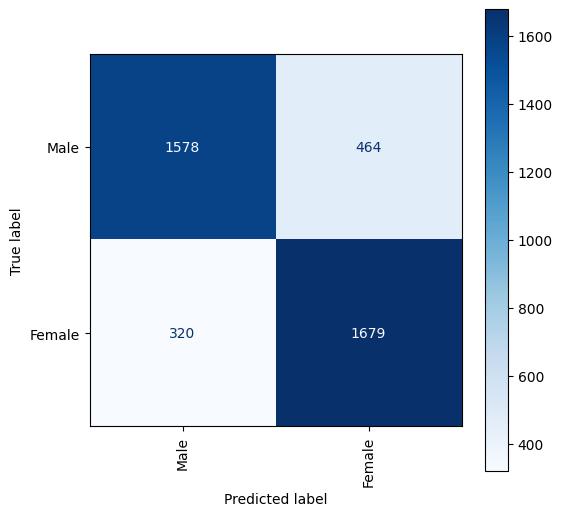


=== VALUTAZIONE per ETHNICITY ===
Classification Report
               precision    recall  f1-score   support

       White       0.83      0.61      0.70      1290
       Black       0.65      0.80      0.72       904
       Asian       0.92      0.49      0.64       701
      Indian       0.41      0.83      0.55       788
      Others       1.00      0.00      0.01       358

    accuracy                           0.62      4041
   macro avg       0.76      0.55      0.52      4041
weighted avg       0.74      0.62      0.60      4041

F1: 52.22%
Recall: 54.71%
Precision: 76.08%
Accuracy: 62.11%


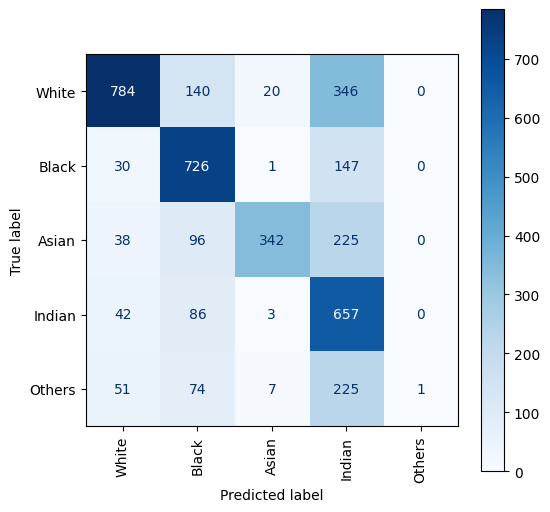

🏃 View run intelligent-vole-882 at: https://dagshub.com/simoLoc/ProgettoSE4AI.mlflow/#/experiments/2/runs/59913bbf06194f3e85c7f0676016f421
🧪 View experiment at: https://dagshub.com/simoLoc/ProgettoSE4AI.mlflow/#/experiments/2


In [ ]:

with mlflow.start_run():
  print("=== VALUTAZIONE per AGE ===")
  acc_age, prec_age, rec_age, f1_age = get_info_evaluation(
      y_test_age, y_pred_age, classes_age, "age"
  )

  print("\n=== VALUTAZIONE per GENDER ===")
  acc_gender, prec_gender, rec_gender, f1_gender = get_info_evaluation(
      y_test_gender, y_pred_gender, classes_gender, "gender"
  )

  print("\n=== VALUTAZIONE per ETHNICITY ===")
  acc_eth, prec_eth, rec_eth, f1_eth = get_info_evaluation(
      y_test_ethnicity, y_pred_ethnicity, classes_ethnicity, "ethnicity"
  )


# Evaluation Fairness

In [ ]:
!pip install fairlearn

In [ ]:
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference, demographic_parity_difference, demographic_parity_ratio
import numpy as np

def fairness_metrics_fairlearn(data, target_col, pred_col, sensitive_cols):
    results = {}

    # Calcolo delle frequenze (supporti) per ciascuna classe
    label_counts = data[target_col].value_counts().sort_index().to_dict()
    # sommatoria totale
    total_count = sum(label_counts.values())

    labels = sorted(data[target_col].unique())

    for sensitive in sensitive_cols:
        eod_list = []
        parity_list = []

        sensitive_features = data[sensitive]
        for label in labels:

            # Binarizza target e predizione (One-vs-All)
            y_true_bin = data[target_col].apply(lambda x: 1 if x == label else 0)
            y_pred_bin = data[pred_col].apply(lambda x: 1 if x == label else 0)

            try:
                eod = equalized_odds_difference(
                    y_true=y_true_bin,
                    y_pred=y_pred_bin,
                    sensitive_features=sensitive_features
                )

                parity_diff = demographic_parity_difference(
                    y_true=y_true_bin,
                    y_pred=y_pred_bin,
                    sensitive_features=sensitive_features
                )

                # Peso = numero di esempi con true==label
                support = label_counts[label]

                # Salviamo per calcolo pesato
                eod_list.append((label, eod, support))
                parity_list.append((label, parity_diff, support))

                prefix = f"target_{target_col}_{label}_sensitive_{sensitive}"

                mlflow.log_metric(f"{prefix}_equalized_odds_difference", eod)
                mlflow.log_metric(f"{prefix}_statistical_parity_diff", parity_diff)


                if sensitive not in results:
                    results[sensitive] = []

                results[sensitive].append({
                    'target_label': label,
                    'support': support,
                    'equalized_odds_difference': eod,
                    'statistical_parity_difference': parity_diff
                })

                print(f"[{target_col} = {label}] - Sensitive: {sensitive}")
                print(f"EOD: {eod:.4f}, \n SPD: {parity_diff:.4f}")

            except ValueError as e:
                print(f"Errore con target={target_col}, label={label}, sensitive={sensitive}: {e}")

        weighted_eod = sum(support * eod for (_, eod, support) in eod_list) / total_count
        weighted_spd = sum(support * parity for (_, parity, support) in parity_list) / total_count

        print(f"Mean EOD for {sensitive}: {weighted_eod:.4f}")
        print(f"Mean SPD for {sensitive}: {weighted_spd:.4f}")

        mlflow.log_metric(f"mean_{target_col}_sensitive_{sensitive}_eod", weighted_eod)
        mlflow.log_metric(f"mean_{target_col}_sensitive_{sensitive}_spd", weighted_spd)

    return results


In [ ]:
# Crea DataFrame con target reali e predetti per ogni attributo
df = pd.DataFrame({
    'age': y_test_age,
    'gender': y_test_gender,
    'ethnicity': y_test_ethnicity,
    'pred_age': y_pred_age,
    'pred_gender': y_pred_gender,
    'pred_ethnicity': y_pred_ethnicity
})

with mlflow.start_run():
  print("=== FAIRNESS EVALUATION per AGE ===")
  results_age = fairness_metrics_fairlearn(
      data=df,
      target_col='age',
      pred_col='pred_age',
      sensitive_cols=['gender', 'ethnicity']
  )

  print("\n=== FAIRNESS EVALUATION per GENDER ===")
  results_gender = fairness_metrics_fairlearn(
      data=df,
      target_col='gender',
      pred_col='pred_gender',
      sensitive_cols=['age', 'ethnicity']
  )

  print("\n=== FAIRNESS EVALUATION per ETHNICITY ===")
  results_ethnicity = fairness_metrics_fairlearn(
      data=df,
      target_col='ethnicity',
      pred_col='pred_ethnicity',
      sensitive_cols=['age', 'gender']
  )

# # Visualizza risultati
# import pprint
# pprint.pprint(results_gender)


=== FAIRNESS EVALUATION per AGE ===
[age = 0] - Sensitive: gender
EOD: 0.0885, 
 SPD: 0.0198
[age = 1] - Sensitive: gender
EOD: 0.0426, 
 SPD: 0.0017
[age = 2] - Sensitive: gender
EOD: 0.0463, 
 SPD: 0.0227
[age = 3] - Sensitive: gender
EOD: 0.0804, 
 SPD: 0.0046
Mean EOD for gender: 0.0553
Mean SPD for gender: 0.0102
[age = 0] - Sensitive: ethnicity
EOD: 0.3963, 
 SPD: 0.2049
[age = 1] - Sensitive: ethnicity
EOD: 0.4643, 
 SPD: 0.3138
[age = 2] - Sensitive: ethnicity
EOD: 0.2530, 
 SPD: 0.1305
[age = 3] - Sensitive: ethnicity
EOD: 0.1600, 
 SPD: 0.0140
Mean EOD for ethnicity: 0.3992
Mean SPD for ethnicity: 0.2444

=== FAIRNESS EVALUATION per GENDER ===
[gender = 0] - Sensitive: age
EOD: 0.5056, 
 SPD: 0.4457
[gender = 1] - Sensitive: age
EOD: 0.5056, 
 SPD: 0.4457
Mean EOD for age: 0.5056
Mean SPD for age: 0.4457
[gender = 0] - Sensitive: ethnicity
EOD: 0.2299, 
 SPD: 0.2073
[gender = 1] - Sensitive: ethnicity
EOD: 0.2299, 
 SPD: 0.2073
Mean EOD for ethnicity: 0.2299
Mean SPD for ethn

In [ ]:
dic = {
  "age": {
    "0": "young",
    "1": "adult",
    "2": "senior",
    "3": "elderly"
  },
  "ethnicity": {
    "0": "White",
    "1": "Black",
    "2": "Asian",
    "3": "Indian",
    "4": "Others"
  },
  "gender": {
    "0": "Male",
    "1": "Female"
  }
}
